<a href="https://colab.research.google.com/github/Nicocro/CV_Assignments/blob/master/4_2_Learning_features_from_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.2 Learning Features from Data #

An alternative approach to handcrafting features that capture desired object properties is to learn these features from training data.

## 4.2.1 Unsupervised learning: PCA ## 

unsupervised learning approach  to find different components of variation present in our faces training set. 

## PCA background theory ## 

### Rationale ##

Our aim is to learn which are the "building blocks" of a face and try to describe any face as a linear combination of those general building blocks. 
In order to do that we need to understand how different faces share some characteristics and which are the characteristics (features) that varies the most. Those features expressing highest _variance_ are exactly what we are looking for, since those. would capture the main different elements of which a face is composed by and thus will become our "building blocks" (eigenfaces). 
The problem translates into calculating the covariance matrix of our images and picking the directions of maximum variance of such a matrix. it basically boils down to finding out the eigenvectors of such a matrix, and then describe the faces as a linear combination of a limited number of those eigenvectors. 

### Covariance and covariance matrix ###

The covariance $\sigma (x,y)$ of two random variables $x$ and $y$ is _defined_ as:

> $\sigma (x,y) = \frac{1}{m−1} \sum_{i=1}^m (x_i-\bar{x})(y_i−\bar{y})$

with $m$ samples. The variance $\sigma^2_x$ of a variable $x$ can also be expressed as the covariance with itself by by $\sigma(x,x)$.

#### Covariance Matrix ####

The sample covariance of $m$ observations (in our case: # of images) of $n$ variables (in our case: total # of pixels per image) is the square $nxn$ **covariance matrix** $C_{j,k}$ 
: 

> $C_{j,k} = \sigma(x_j,x_k)$ where $C \in R^{nxn}$

*   The covariance matrix is _symmetric_ since $\sigma (x_j,x_k)= \sigma (x_k,x_j)$
*   The diagonal entries of the covariance matrix are the variances and the other entries are the covariances

The entries of the covariance matrix can be expressed as:

> $c_{j,k}=\frac{1}{m-1}\sum_{i=1}^m (x_{ij}-\bar{x})(x_{ik}-\bar{x}_k)$

Following from this equation, knowing that our data set is expressed by the matrix $X \in R^{mxn} $ the covariance matrix can be computed for a data set _with zero mean_ with:

> $C = \frac{1}{m-1} X^TX$ 

by using the semi-definite matrix $X^TX$. Note that the size of the covariance matrix is independent from the number of samples. We could have had a different # of images but the $C$ would still be $nxn$. What defines the size of $C$ is the # of variables, or, in our case, of pixels. 

The **eigenvectors** of $C$ represent the axis along which the data varies the most. 



## SVD Singular Value Decomposition ##

the singular value decomposition (SVD) is a factorization of a real or complex matrix that generalizes the eigendecomposition of a square normal matrix to any $X_{m,n}$ matrix.

Specifically, the singular value decomposition of a real or complex matrix $X_{m,n}$ is a factorization of the form (link to theorem):

> $X = U\Sigma V^T$ where:

*   $U_{m,m}$ is a _unitary, orthonormal matrix_  whose columnsa re called **"left-singular vectors"**
*   $\Sigma_{m,n}$ is a rectangular _diagonal matrix_ whose entries $\sigma_i = \Sigma_{ii}$ are called **singular values** 
*   $V_{n,n}$ is a _orthonormal marix_ whose columns are called **"right-singular vectors"**

SVD is not unique: it is always possible to choose the decomposition so that the sinngular values $\Sigma_{ii}$ are in descending order. 


## Relation between PCA and SVD ##

Let us apply SVD decomposition to our data matrix $X$.

> $X = U\Sigma V^T$

let us rewrite the covariance matrix in these terms:

> $\frac{1}{1-m} X^TX = \frac{1}{1-m}(U\Sigma V^T)^T(U\Sigma V^T) $ 

Generally, we know that $(AB)^T= B^TA^T$, so it follows that:

> $\frac{1}{1-m} X^TX = \frac{1}{1-m}(V\Sigma^T U^T)(U\Sigma V^T) $ 

$U$ is _orthonormal_ so: $U^T = U^{-1}$, from that follows that $U^TU = I_m$, which brings our relation to:

> $\frac{1}{1-m} X^TX = \frac{1}{1-m}V\Sigma^T \Sigma V^T $ 

At this stage we observe that both matrices $X^TX$ and $\Sigma^T \Sigma$ are square $nxn$ matrices and they are similar. Similar matrices have the same eigenvalues. 

Moreover, the $nxn$ covariance matrix $C$ is symmetric and can be diagonalized:

> $C = DLD^T = \frac{1}{1-m} V\Sigma^2 V^T$

Where $D$ is a matrix of eigenvectors (each column is an eigenvector) and $L$ is a diagonal matrix with eigenvalues $\lambda_i$ in the decreasing order on the diagonal. Thus, $D=V$ and **right-singular** vectors are _principal directions_ and singular values are related to the eigenvalues of covariance matrix via $\lambda_i = \frac{\sigma^2_i}{m-1}$

Projections of the data on the principal axes are called principal components, also known as PC scores. Principal components are given by:

> $XV=USV^TV=US$ 






## 0. Setup ##

Load the necessaries libraries, packages, dependencies

### Dataset pre-processing ###

Images have been carefully selected to be more representative.
20 Training images from subject A: Gordon Ramsey, have been selected, centered and cropped to a square 64x64 pixel format. These operations have been carried out offline through a design tools for more precision. The dataset size being small (20 images) allowed for this manual pre-processing

### Importing libraries ### 

The following code import libraries, packages and dependencies needeed

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mping
import tensorflow as tf
import os
import requests
from pathlib import Path
from glob import iglob
import cv2 
from sklearn.decomposition import TruncatedSVD
import scipy

## 1. Build Matrix $X_{m,n}$

The following code uploads images from subject A - Gordon Ramsay - into a Pandas DataFrame. Images are loaded flattened out onto a series of 1 dimensional 64x64 = 4096 array.

The DataFrame can be seen as a matrix  𝑋𝑚,𝑛  with  𝑚  = number of samples (images) and  𝑛  = number of pixels per image.




In [ ]:
faces = pd.DataFrame([])
for path in iglob('/content/drive/My Drive/Computer Vision/CV_dataset/SubjectA_GR/*.png'):
 img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
 face = pd.Series(img.flatten(),name = path.replace("/content/drive/My Drive/Computer Vision/CV_dataset/",""))
 faces = faces.append(face).astype(int)

for path in iglob('/content/drive/My Drive/Computer Vision/CV_dataset/SubjectB_JM/*.png'):
 img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
 face = pd.Series(img.flatten(),name=path.replace("/content/drive/My Drive/Computer Vision/CV_dataset/",""))
 faces = faces.append(face).astype(int)

Sanity check on the dataframe

In [ ]:
print(len(faces))
print(len(faces.columns))
print(faces.head())

40
4096
                         0     1     2     3     ...  4092  4093  4094  4095
SubjectA_GR/GR – 12.png    66    59    59    61  ...   129   129   129   129
SubjectA_GR/GR – 13.png    64    74    64   102  ...     0     0     0     0
SubjectA_GR/GR – 11.png    66    64    64    76  ...   219   225   231   234
SubjectA_GR/GR – 10.png   110   110    93    99  ...   137   151   151   149
SubjectA_GR/GR – 14.png   170   170   186   234  ...    50    39    39    28

[5 rows x 4096 columns]


Display Images in a grid

In [ ]:
def displayimages(df):
#This function is designed to take a dataframe with faces as an argument, 
# and plot the 20 faces in greyscale in one snapshot
    fig =plt.figure(figsize=(20,10))
    columns = 10
    rows  = 4
    ax=[]
    for i in range(len(df)) :
        imageshaped = np.reshape(np.array(df.iloc[i]), (64,64))
        ax.append(fig.add_subplot(rows, columns,i+1))
        ax[-1].set_title("fig#"+str(i))
        plt.imshow(imageshaped, cmap='gray')
        
    plt.show()

    return

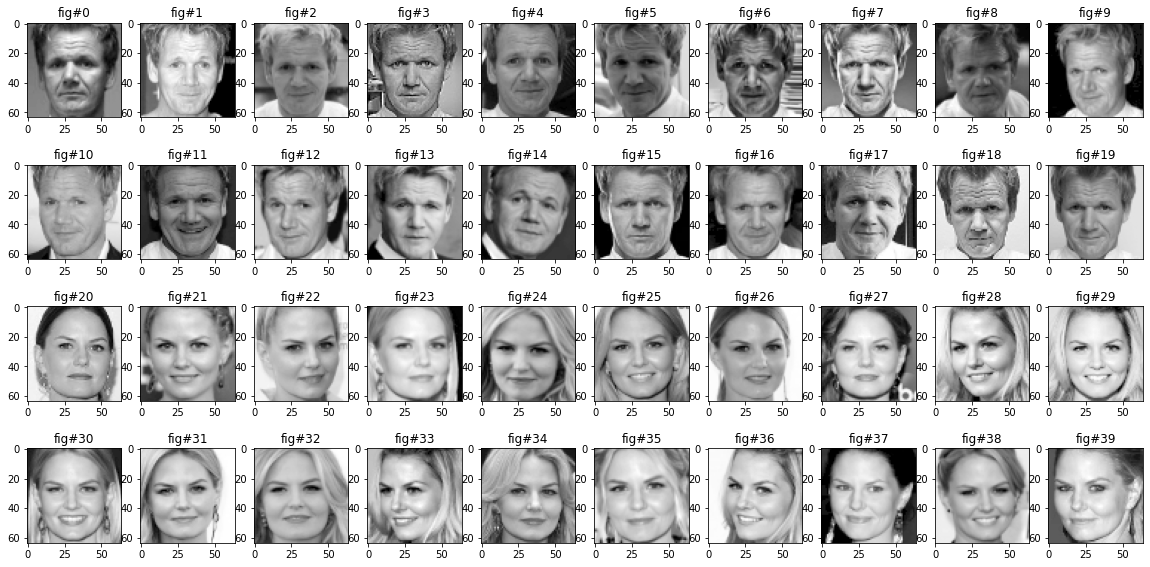

In [ ]:
#show the images in a 4x5 grid
displayimages(faces)

[[ 66  59  59 ... 129 129 129]
 [ 64  74  64 ...   0   0   0]
 [ 66  64  64 ... 225 231 234]
 ...
 [ 56  56  56 ...  53  53  56]
 [215 215 214 ... 228 229 230]
 [ 82  80  80 ... 188 190 176]]


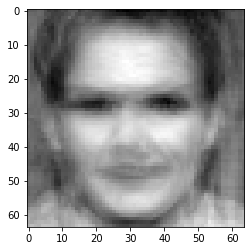

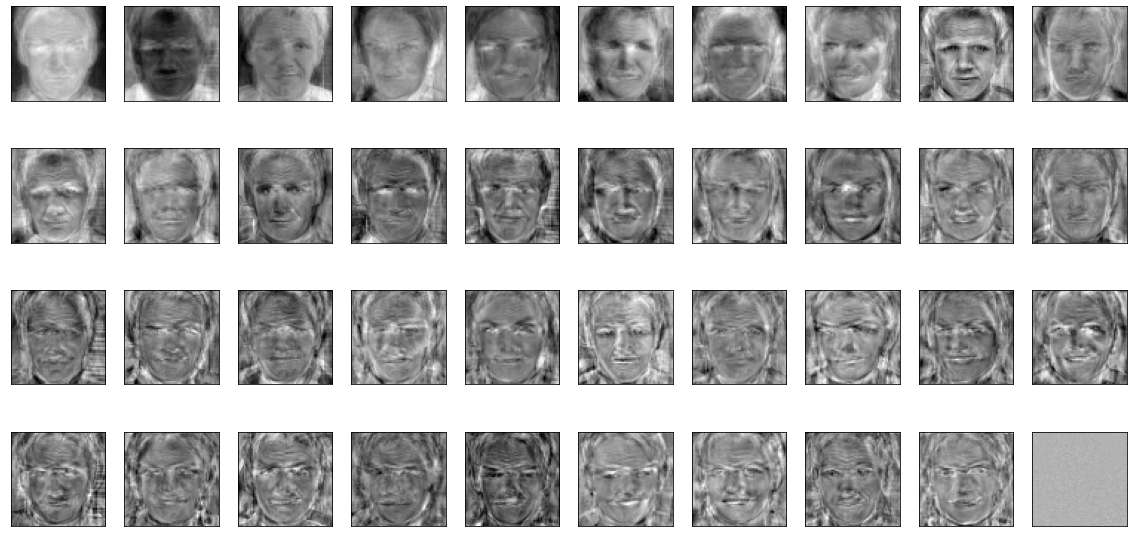

In [ ]:

X_train = faces.to_numpy()
print(X_train)

from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(X_train)

plt.imshow(pca.mean_.reshape(64,64), cmap='gray')

fig = plt.figure(figsize=(20,10))
for i in range(40):
  ax = fig.add_subplot(4,10, i+1, xticks=[], yticks=[])
  ax.imshow(pca.components_[i].reshape(64,64), cmap='gray')

## 2. Mean subtraction ##

Performing mean subtraction: The data need to be centered. 

Let $X_{m,n}$ be the images matrix as defined before. 
Let $\hat{x}_i$ be the (row) vectors representing each image ($\hat{x}_i$ has thus 4096 coordinates).
Centering the data is achieved by imposing the mean to be equal to 0. 

$\frac{1}{m}\sum_{i=0}^{m-1} \hat{x}_i$

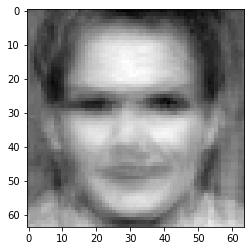

In [ ]:
#returns a pandas series with key value = imgpath e value column (index=0) with the mean of
#the column 
faces_mean = faces.apply(lambda x: x.mean(), axis=0).astype(int)

#display the mean face
mean_face = np.reshape(np.array(faces_mean), (64,64))
plt.imshow(mean_face, cmap='gray')

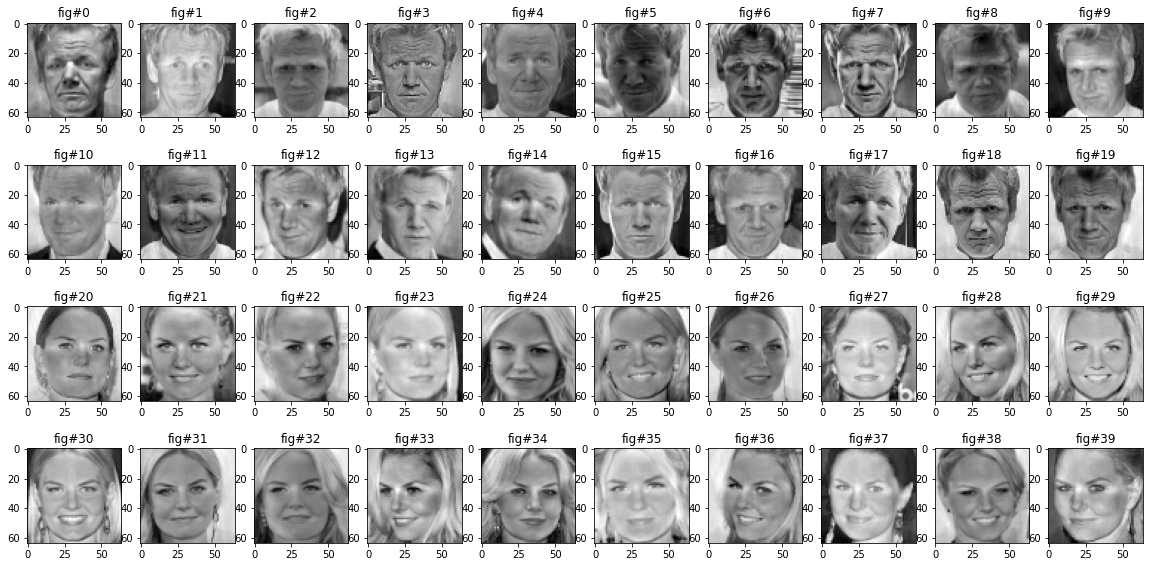

In [ ]:
#returns a pandas dataframe with centered images (original images - the mean)
faces_centered = faces.subtract(faces_mean, axis = 1)

#show the centered images 
displayimages(faces_centered)

## 3. Compute SVD ##

compute SVD and show principal components

X: (40, 4096)
U: (40, 40)
Sigma: (40,)
V^T: (40, 4096)
<class 'numpy.ndarray'>


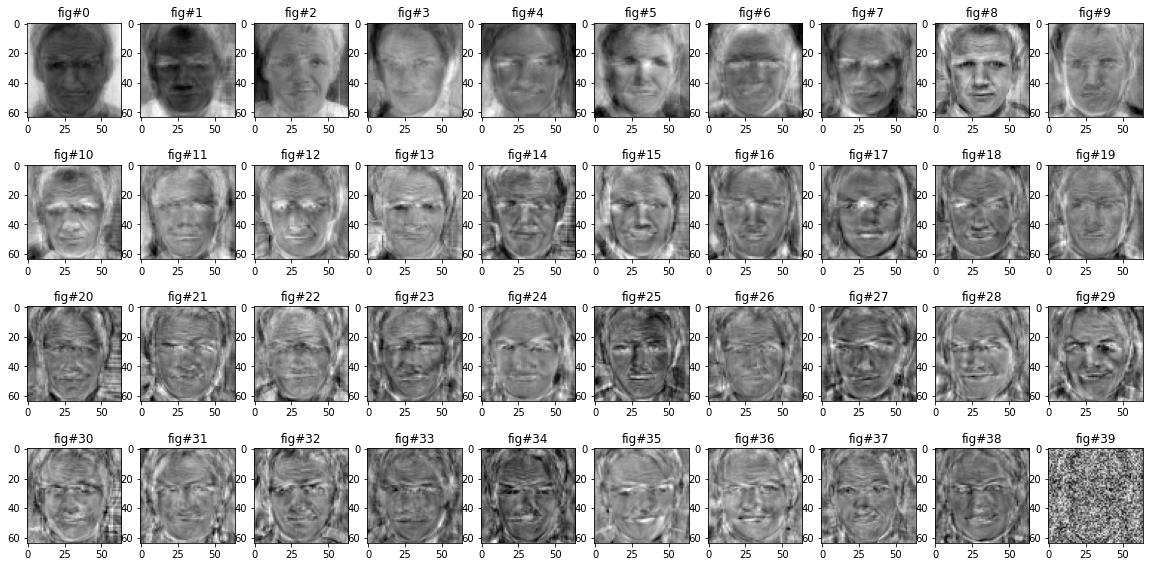

In [ ]:
U, Sigma, VT = np.linalg.svd(faces_centered, full_matrices=False)

# Sanity check on dimensions
print("X:", faces_centered.shape)
print("U:", U.shape)
print("Sigma:", Sigma.shape)
print("V^T:", VT.shape)
print(type(VT))

#put the principal components (eigenfaces in a dataframe) and display the result
principal_components = pd.DataFrame(VT)
displayimages(principal_components)

## 4. Calculate weights #

At this stage, we calculate the weights of our train images. We do so by projecting the images onto the principal components. Weights represents scalars for each imagee and for each principal component. Every image can be expressed as a linear combination of all the eigenfaces.

In [ ]:
#calculate weights of the eigenfaces 
weights = faces_centered.dot(principal_components.transpose())
print('weights:', weights.shape)

weights: (40, 40)


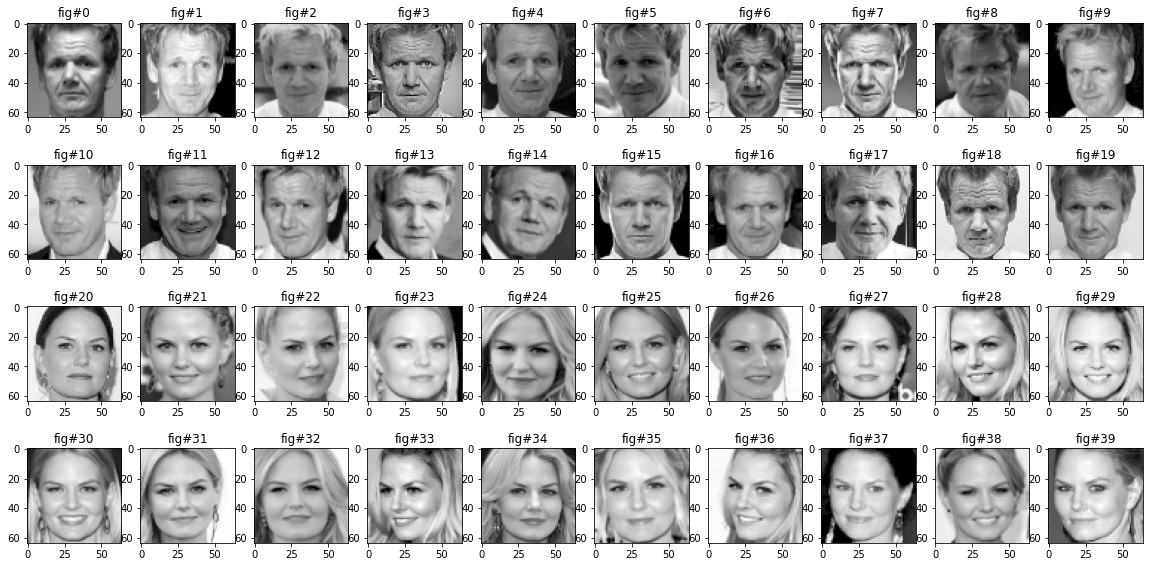

In [ ]:
# reconstruct initial images as a linear combination of the 20 eigenfaces with associated weights
reconstructed_faces = weights.dot(principal_components)
# add back the mean
reconstructed_faces = reconstructed_faces.add(faces_mean, axis = 1)

#check 
displayimages(reconstructed_faces)

## 5. Calculate each face with few eigenfaces ##

Now we can show each face as the linear combination of just some weights with the associated eigenfaces. We will visualize how many eigenfaces + weights we need to keep in order to have a sufficiently good representation of the selected face

### Selecting the right number of eigenfaces ###

PCA allows us to select a $k < m$ number of principal components to represent thee faces. $k$ can be found on a rigorous way understanding how many components explain a good amount of total variance of the data. However, that step would require calculating the covariance matrix. We decided to avoid that step and use SVD instead due to the fact that manipulating such big matrixes can be computationally expensive. We thus use an empirical method to find an optimal $k$ by trial and error 

In [ ]:
# selct a k number of principal components and project a set of faces on those components. Reconstruct original images as a linear combination
# of principal components 

def eigenface_redu(centeredfaces_df, facesmean_sr, eigenfaces_df, k):
  
  #coordinates coincide with weights
  reduced_eigenfaces = eigenfaces_df.head(k)
  coordinates = pd.DataFrame(centeredfaces_df.dot(reduced_eigenfaces.transpose()))
  
  reconstructed_imgs = coordinates.dot(reduced_eigenfaces)
  reconstructed_imgs = reconstructed_imgs.add(facesmean_sr, axis = 1)

  return coordinates, reconstructed_imgs

weights_reduced: (40, 19)
prova: (40, 4096)


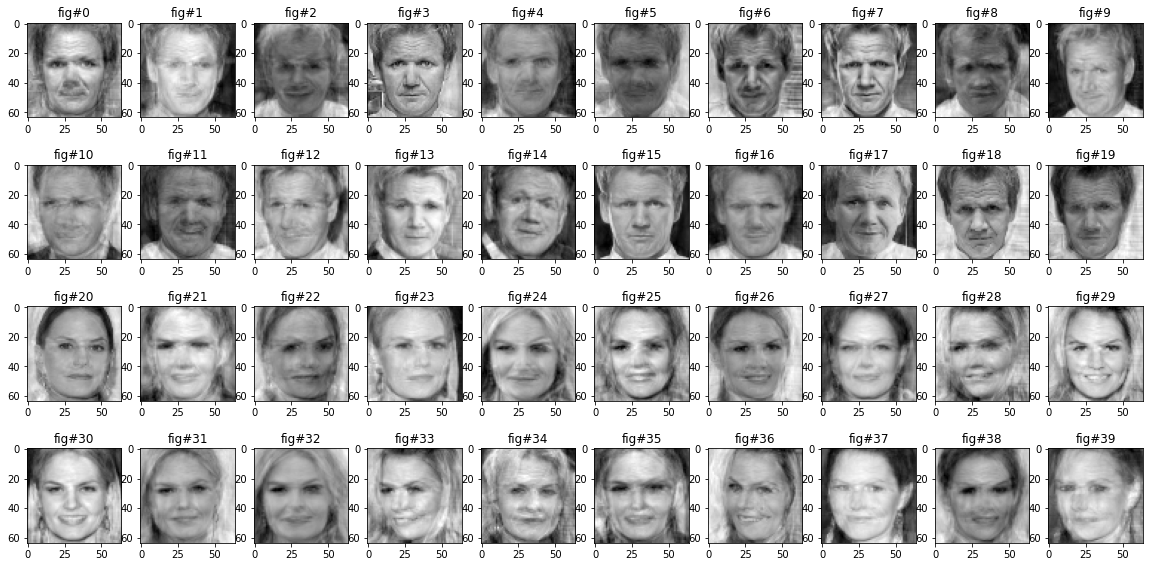

In [ ]:
weights_reduced, prova = eigenface_redu(faces_centered, faces_mean, principal_components, 19)

print('weights_reduced:', weights_reduced.shape)
print('prova:',prova.shape)
displayimages(prova)

## 6. Project the test images onto the k-components ##

project the test images onto the same k-components and visualize the new faces


In [ ]:
test_faces = pd.DataFrame([])
for path in iglob('/content/drive/My Drive/Computer Vision/CV_dataset/A_test/*.png'):
 test_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
 test_face = pd.Series(test_img.flatten(),name = path.replace("/content/drive/My Drive/Computer Vision/CV_dataset/",""))
 test_faces = test_faces.append(test_face).astype(int)

for path in iglob('/content/drive/My Drive/Computer Vision/CV_dataset/B_test/*.png'):
 test_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
 test_face = pd.Series(test_img.flatten(),name=path.replace("/content/drive/My Drive/Computer Vision/CV_dataset/",""))
 test_faces = test_faces.append(test_face).astype(int)


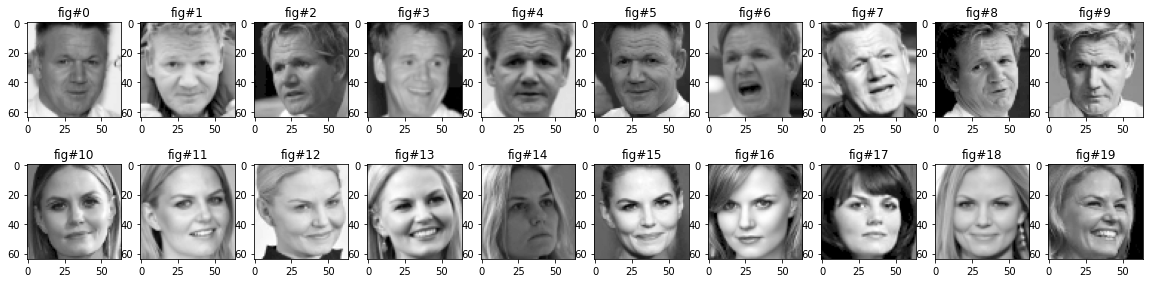

In [ ]:
displayimages(test_faces)

Subtract the mean from test faces

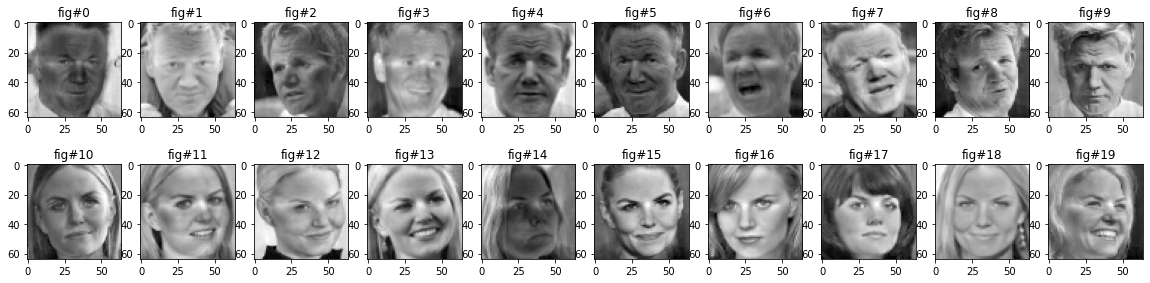

In [ ]:
test_faces_centered = test_faces.subtract(faces_mean, axis = 1)

#show the centered images 
displayimages(test_faces_centered)

prova: (20, 4096)
weights: (20, 19)


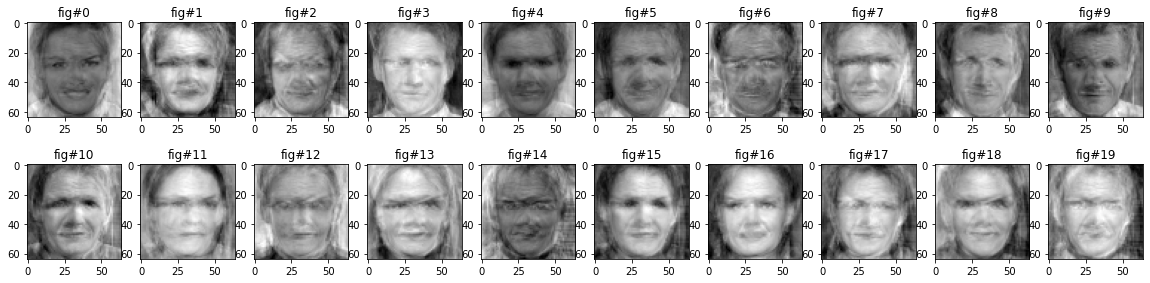

In [ ]:
test_weights, test_eigencombi = eigenface_redu(test_faces_centered, faces_mean, principal_components, 19)

print('prova:', test_eigencombi.shape)
print('weights:', test_weights.shape)
displayimages(test_eigencombi)

### The Face_feature plot ###

Let's plot the test faces for subject A and B on the 2 main principal components

In [ ]:
wtest2 = pd.DataFrame(test_weights.iloc[:,:2])
print(wtest2)

                                  0            1
A_test/A_test_GR_7.png  2516.554605  1076.235726
A_test/A_test_GR_4.png  -721.696987  -188.215418
A_test/A_test_GR_9.png -2316.735176  1830.360265
A_test/A_test_GR_5.png -3107.596231   138.495012
A_test/A_test_GR_8.png  2231.693498  1009.470026
A_test/A_test_GR_1.png  -998.242682  1590.480332
A_test/A_test_GR_3.png  -764.787978  1358.845127
A_test/A_test_GR_2.png   -17.895775  -574.078108
A_test/A_test_GR_6.png -2864.715813  1702.123852
A_test/A_test_GR_0.png   683.662328  1204.159340
B_test/B_test_JM_6.png  -494.330342   178.784672
B_test/B_test_JM_8.png   238.724479  -773.557643
B_test/B_test_JM_2.png  2918.371807 -1233.055101
B_test/B_test_JM_7.png   688.611135 -1564.695531
B_test/B_test_JM_0.png    -8.566882  1516.956292
B_test/B_test_JM_3.png  -835.921417 -1039.058417
B_test/B_test_JM_9.png -1628.349407 -1011.038848
B_test/B_test_JM_4.png -3079.553555   217.506019
B_test/B_test_JM_5.png   102.090384 -1408.529318
B_test/B_test_JM_1.p

In [ ]:
from bokeh.plotting import figure, show, output_file
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, Grid, ImageURL, LinearAxis, Plot, Range1d

# Create a blank figure with labels
p = figure(plot_width = 600, plot_height = 600, 
           title = 'Test faces plotted along the first 2 principal components',
           x_axis_label = 'Eigenface1', y_axis_label = 'Eignface2', x_range=(-4000,4000), y_range=(-4000,4000))

for i, rows in wtest2.iterrows():
    imgurl = 'https://github.com/Nicocro/CV_Assignments/blob/master/Dataset_Faces/' + rows.name + '?raw=true'
    
    p.image_url(url=[imgurl], x=wtest2.loc[rows.name,0],y=wtest2.loc[rows.name,1],w=500, h=500, anchor='center')
  
output_notebook()
# Show the plot
show(p)

# 5.1 and 5.2 Classification and identification #

We want to show similarity across faces to identify and classify them. Both goals can be achieved by calculating the euclidean distance between the weights vectors of the set of training images and the weights vector of a test image. Minnimizing such a distance means providing an identification of the face. Classifying the face can be achieved in a similar way just by grouping the result under a class name tag, rather than idenfitying exactly the best matching face.


In [ ]:
def simil(trainfaces_df, testface, k_components):

  # trainfaces_df is a pandas dataframe containing the trainiing faces: a matrix of m samples (faces) and n variables 
  # (pixels per face) TESTface is a pandas series, k_components is an integer

  #center train images
  train_faces_mean = trainfaces_df.apply(lambda x: x.mean(), axis=0).astype(int)
  train_faces_centered = trainfaces_df.subtract(faces_mean, axis = 1)
  #center test image
  centered_test_face = pd.DataFrame(testface.subtract(faces_mean))
  t_centered_test_face = centered_test_face.transpose()
  #find all the eigenfaces
  U_train, Sigma_train, VT_train = np.linalg.svd(train_faces_centered, full_matrices=False)
  eigenfaces_train = pd.DataFrame(VT_train)

  #find weight (coordinates) of the train images --> scalars to linearly combinate eigenfaces
  reduced_eigenfaces_train = eigenfaces_train.head(k_components)
  w_train_coordinates = pd.DataFrame(train_faces_centered.dot(reduced_eigenfaces_train.transpose()))
  
  #find weights (coordinates) of the test image --> scalars to linearly combinate train eigenfaces 
  w_test_coordinates = pd.DataFrame(t_centered_test_face.dot(reduced_eigenfaces_train.transpose()))

  #calculate euclidean distance between the test image weights and the train weights, the minimal the distance, the closest the image
  distances = pd.DataFrame(scipy.spatial.distance.cdist(w_test_coordinates.iloc[:,1:], w_train_coordinates.iloc[:,1:], metric='euclidean'))
  min_index = distances.idxmin(axis=1)

  #print(min_index)
  similar_face = trainfaces_df.iloc[min_index[0]]
  #similar_face = np.reshape(np.array(trainfaces_df.iloc[min_index[0]]), (64,64))
  #plt.imshow(similar_face, cmap='gray')

  return similar_face

Visualize the image we are testing

In [ ]:
print()

Spitting out the most similar image in the train images


We wanna show in a plot the most similar images to the test ones

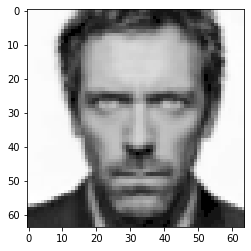

In [ ]:
path = '/content/drive/My Drive/Computer Vision/CV_dataset/SubjectC_HL/HL_0.png'
trial_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
trial_face = pd.Series(trial_img.flatten(),name = path.replace("/content/drive/My Drive/Computer Vision/CV_dataset/SubjectD_MR/",""))
trial_imageshaped = np.reshape(np.array(trial_img), (64,64))
plt.imshow(trial_imageshaped, cmap='gray')
  #df_trial_face = pd.DataFrame(trial_face)
    #print('is similar to:')
    #simil(faces, trial_face, 19)
 #print(df_trial_face)

In [ ]:
print(type(simil(faces, trial_face,19)))

<class 'pandas.core.series.Series'>
